<a href="https://colab.research.google.com/github/gustavohroos/treinamento-h2ia/blob/main/busca-competitiva/busca_competitiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

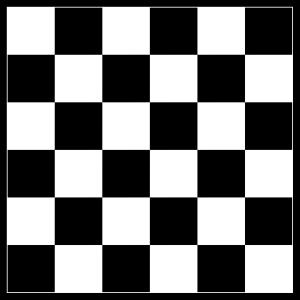

In [333]:
from __future__ import annotations
from typing import List, Tuple
import numpy as np

In [334]:
class Piece:
    def __init__(self, row: int, col: int, owner: str) -> None:
        self.queen = False
        self.row = row
        self.col = col
        self.owner = owner

    def make_queen(self) -> None:
        self.queen = True

    def move(self, row, col):
        self.row = row
        self.col = col

    def get_moves(self, state: np.ndarray) -> List[Tuple[int]]:
        moves = set()
        left = self.col - 1
        right = self.col + 1
        row = self.row

        if self.owner == 'I' or self.queen:
            if left >= 0:
                if self.owner == 'I' and state[row+1][left] == 0:
                    moves.add((row+1, left, 'left'))
                elif self.owner == 'I' and state[row+1][left].owner == 'P':
                    moves.clear()
                    moves.add((row+2, left+1, 'left'))
                elif self.owner == 'P':
                    print() 
            if right <= 5 and self.owner == 'I' and state[row+1][right] == 0:
                moves.add((row+1, right, 'right'))
        if self.owner == 'P' or self.queen:
            if left >= 0:
                moves.add((row-1, left, 'left'))
            if right <= 5:
                moves.add((row-1, right, 'right'))
        return moves
    
    def __repr__(self):
        return self.owner

In [335]:
class Board:
    
    def __init__(self, state: np.ndarray = None) -> None:
        self.player_left = self.ai_left = 6
        self.player_queens = self.ai_queens = 0
        self.player_pieces = []
        self.ai_pieces = []
        self.state = self.setup_game() if state == None else state
        self.winner = None

    def setup_game(self):
        state = []
        for row in range(6):
            state.append([])
            for col in range(6):
                if col % 2 == ((row +  1) % 2):
                    if row < 2:
                        piece = Piece(row, col, 'I')
                        state[row].append(piece)
                        self.ai_pieces.append(piece)
                    elif row > 3:
                        piece = Piece(row, col, 'P')
                        state[row].append(piece)
                        self.player_pieces.append(piece)
                    else:
                        state[row].append(0)
                else:
                    state[row].append(0)
        return np.array(state)

    def get_valid_moves(self) -> List[Tuple[int]]:
        ai_moves = player_moves = []
        for piece in self.ai_pieces:
            ai_moves.append(piece.get_moves(self.state))
        for piece in self.player_pieces:
            player_moves.append(piece.get_moves(self.state))
        return ai_moves

    def move(self, piece: Piece, row: int, col: int) -> None:
        self.state[piece.row][piece.col], self.state[row][col] = self.state[row][col], self.state[piece.row][piece.col]
        piece.move(row, col)

        if row == 5 or row == 0:
            piece.make_queen()
            if piece.owner == 'P':
                self.player_queens += 1
            else:
                self.ai_queens += 1 

    def get_piece(self, row, col):
        return self.state[row][col]

    def __repr__(self) -> str:
        return str(self.state)


In [336]:
class Checkers:

    def __init__(self, state = None) -> None:
        self.board = Board(state)



In [337]:
checkers = Checkers()
checkers.board.get_valid_moves()

[set(),
 set(),
 set(),
 {(2, 1, 'right')},
 {(2, 1, 'left'), (2, 3, 'right')},
 {(2, 3, 'left'), (2, 5, 'right')},
 {(3, 0, 'left'), (3, 2, 'right')},
 {(3, 2, 'left'), (3, 4, 'right')},
 {(3, 4, 'left')},
 {(4, 1, 'right')},
 {(4, 1, 'left'), (4, 3, 'right')},
 {(4, 3, 'left'), (4, 5, 'right')}]

In [338]:
checkers.board.player_pieces[0].row, checkers.board.player_pieces[0].col

(4, 1)

In [339]:
checkers.board

[[0 I 0 I 0 I]
 [I 0 I 0 I 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 P 0 P 0 P]
 [P 0 P 0 P 0]]

In [340]:
checkers.board.move(checkers.board.player_pieces[0], 2, 1)

In [341]:
checkers.board

[[0 I 0 I 0 I]
 [I 0 I 0 I 0]
 [0 P 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 P 0 P]
 [P 0 P 0 P 0]]

In [342]:
checkers.board.get_valid_moves()

[set(),
 set(),
 set(),
 set(),
 {(2, 3, 'right'), (3, 2, 'left')},
 {(2, 3, 'left'), (2, 5, 'right')},
 {(1, 0, 'left'), (1, 2, 'right')},
 {(3, 2, 'left'), (3, 4, 'right')},
 {(3, 4, 'left')},
 {(4, 1, 'right')},
 {(4, 1, 'left'), (4, 3, 'right')},
 {(4, 3, 'left'), (4, 5, 'right')}]